# Objective
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

# Features

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('aug_train.csv')
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


Employee id doesn't seems to have any impact on the prediction if the person would leave job or not.So can easily drop it.

In [2]:
data.drop(['enrollee_id'],axis=1,inplace=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


## City 

In [4]:
data.city.isnull().sum()

0

In [5]:
data.city.value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_121       3
city_129       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64

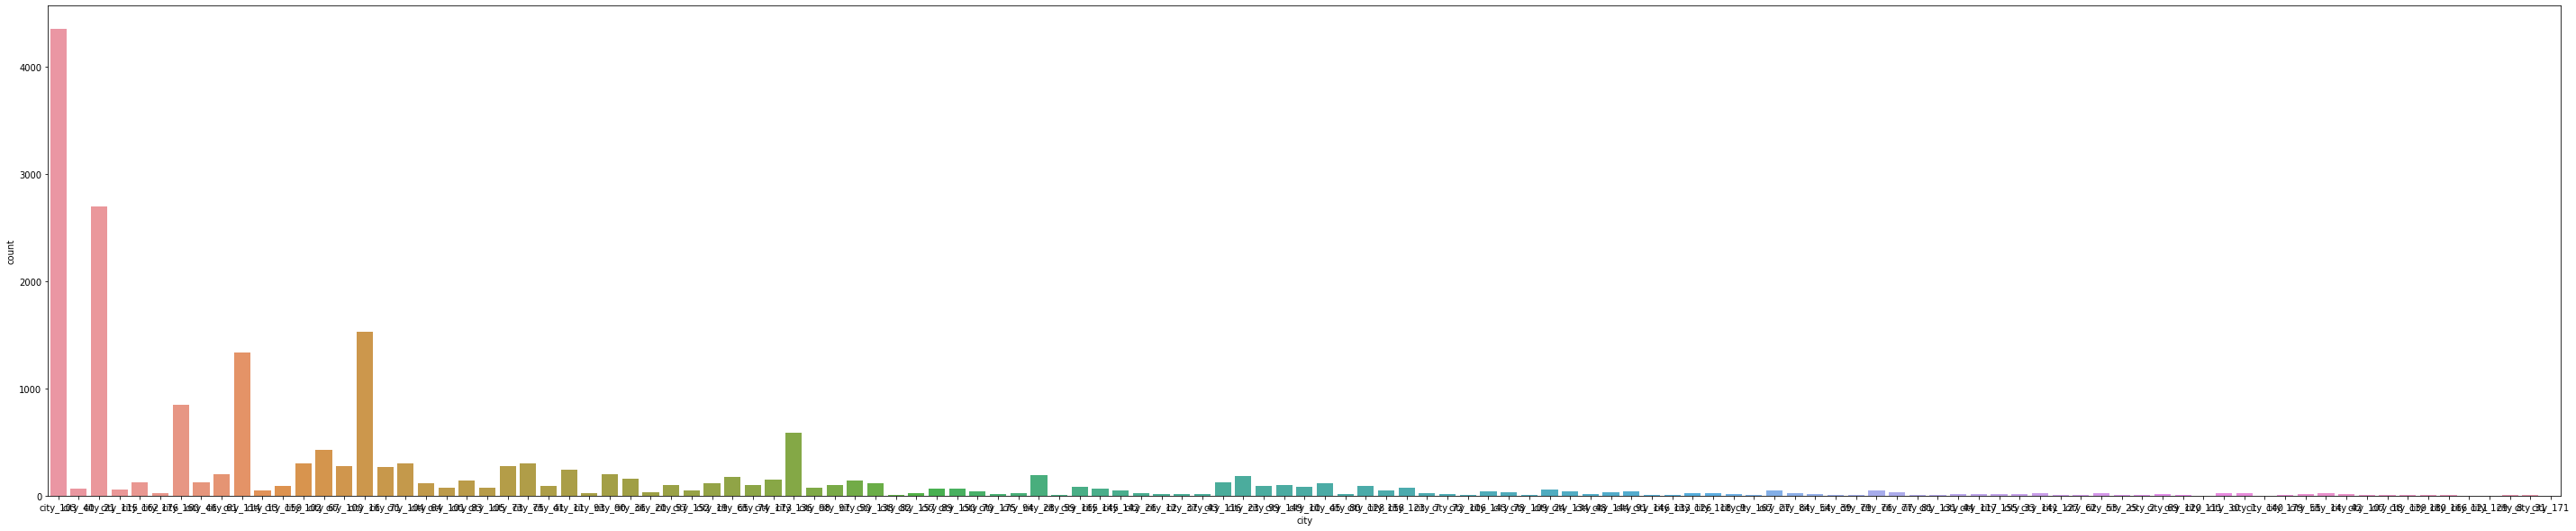

In [6]:
plt.figure(figsize=(50,10))
sns.countplot(data.city)

In [7]:
data.city=pd.Categorical(data.city).codes

## Gender 

In [8]:
(data.gender.isnull().sum()/len(data.gender))*100

23.530639941538784

23.53% data of gender column is missing

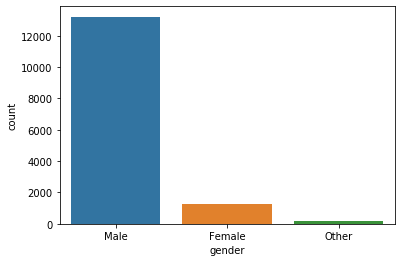

In [9]:
sns.countplot(data.gender)

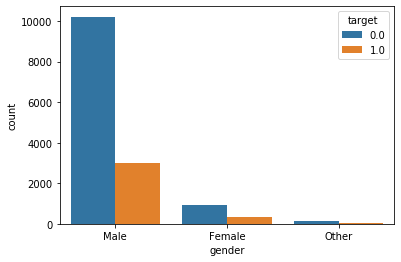

In [10]:
sns.countplot('gender',hue=data.target,data=data)

In [11]:
data.gender.fillna(method='ffill',inplace=True)
data.gender.value_counts()

Male      17260
Female     1647
Other       251
Name: gender, dtype: int64

In [12]:
data.gender=pd.Categorical(data.gender,categories=['Female','Male','Other'],ordered=True).codes

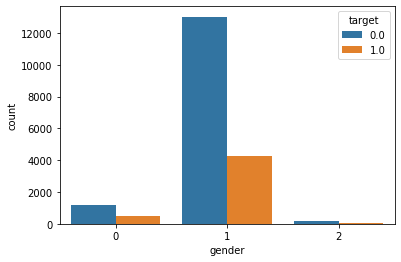

In [13]:
sns.countplot('gender',hue=data.target,data=data)

## Relevent experience

In [14]:
data.relevent_experience.isnull().sum()

0

In [15]:
data.relevent_experience.value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

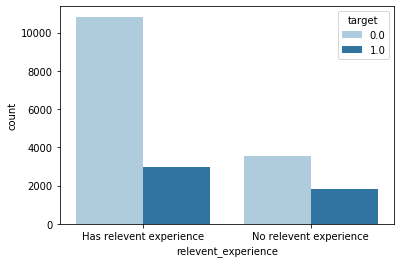

In [16]:
sns.countplot(data.relevent_experience,hue=data.target,palette='Paired')

In [17]:
data.relevent_experience=pd.Categorical(data.relevent_experience,categories=['No relevent experience','Has relevent experience'],ordered=True).codes

# Enrolled University

In [18]:
(data.enrolled_university.isnull().sum()/len(data.enrolled_university))*100

2.0148240943731075

2.01% data is missing in enrolled university column

In [19]:
data.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [20]:
data.enrolled_university.fillna('no_enrollment',inplace=True)

Filling the empty spaces with 'no_enrollment' as it occurs most of the times.

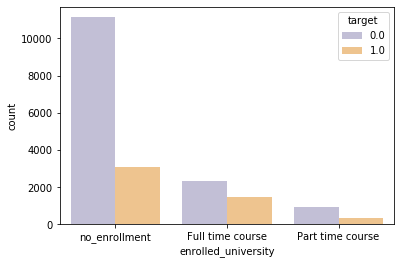

In [21]:
sns.countplot(data.enrolled_university,hue=data.target,palette='PuOr_r')

In [22]:
data.enrolled_university=pd.Categorical(data.enrolled_university,categories=['no_enrollment','Part time course','Full time course'],ordered=True).codes

## Education level 

In [23]:
(data.education_level.isnull().sum()/len(data.education_level))*100

2.401085708320284

In [24]:
data.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [25]:
data.education_level.fillna(method='ffill',inplace=True)

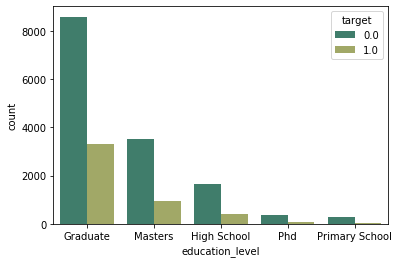

In [26]:
sns.countplot(data.education_level,hue=data.target,palette='gist_earth')

In [27]:
data.education_level=pd.Categorical(data.education_level,categories=['Primary School','Phd','High School','Masters','Graduate'],ordered=True).codes

## Major_discipline

In [28]:
(data.major_discipline.isnull().sum()/len(data.major_discipline))*100

14.68316108153252

In [29]:
data.major_discipline.value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [30]:
data.major_discipline.fillna(method='ffill',inplace=True)

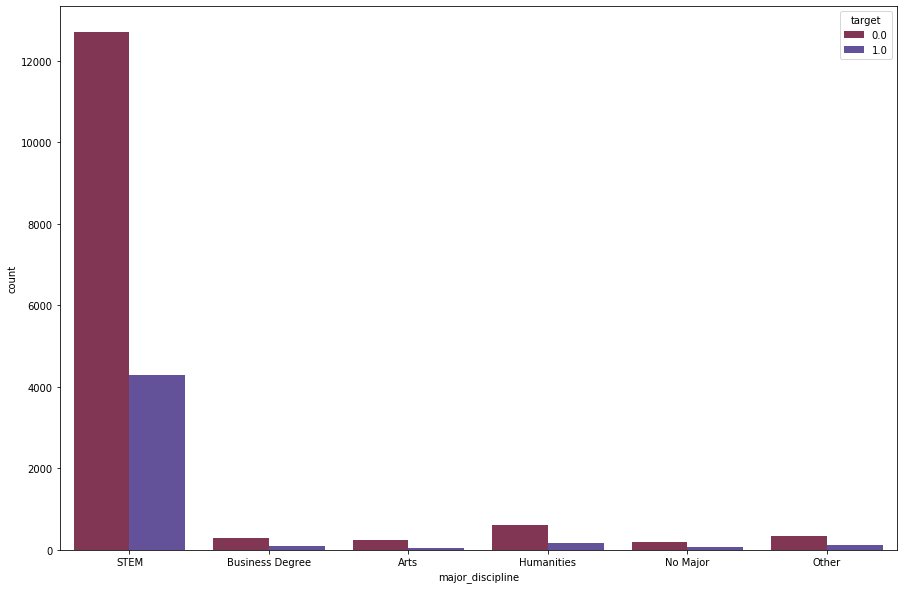

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(data.major_discipline,hue=data.target,palette='twilight_r')

In [32]:
data.major_discipline=pd.Categorical(data.major_discipline,categories=['No Major','Arts','Business Degree','Other','Humanities','STEM']).codes

## Experience

In [33]:
data.experience.isnull().sum()

65

In [34]:
data.experience.fillna(method='ffill',inplace=True)

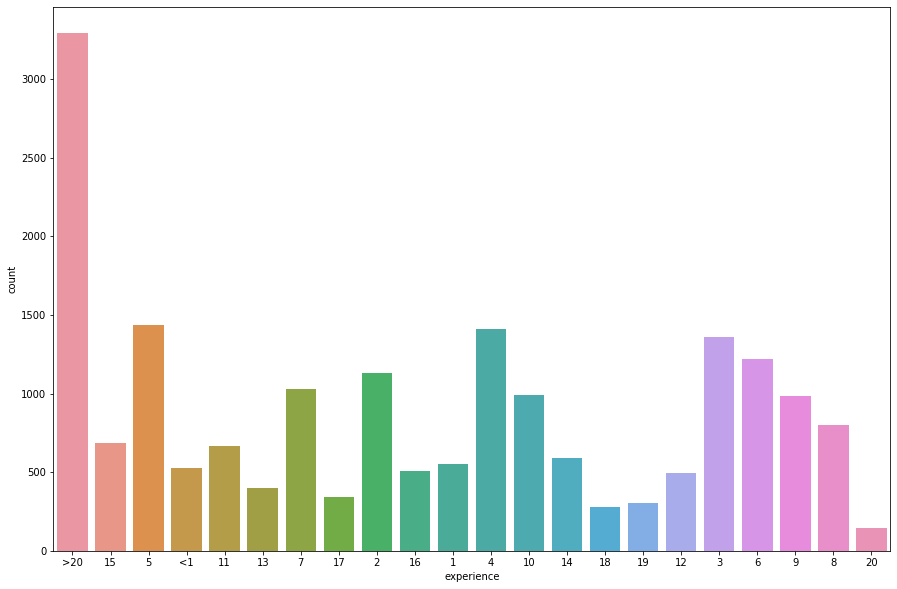

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(data.experience)

In [36]:
data.experience.value_counts()

>20    3294
5      1437
4      1410
3      1362
6      1218
2      1132
7      1030
10      990
9       984
8       802
15      689
11      665
14      589
1       550
<1      524
16      510
12      495
13      401
17      344
19      304
18      280
20      148
Name: experience, dtype: int64

In [37]:
data.experience=pd.Categorical(data.experience,categories=['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20'],ordered=True).codes

## Company Size

In [38]:
data.company_size.isnull().sum()

5938

In [39]:
data.company_size.value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [40]:
data.company_size.fillna(method='bfill',inplace=True)

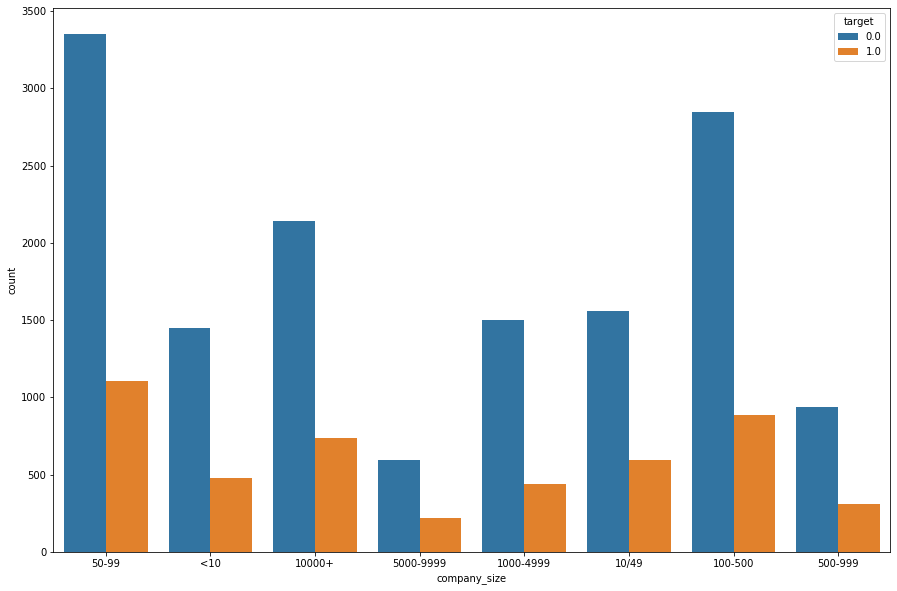

In [41]:
plt.figure(figsize=(15,10))
sns.countplot(data.company_size,hue=data.target)

In [42]:
data.company_size=pd.Categorical(data.company_size,categories=['<10','10/49','50-99','100-500','500-999','1000-4999','5000-9999','10000+'],ordered=True).codes

## Comapany Type

In [43]:
data.company_type.isnull().sum()

6140

In [44]:
data.company_type.fillna(method='ffill',inplace=True)

In [45]:
data.company_type.value_counts()

Pvt Ltd                14521
Funded Startup          1468
Public Sector           1373
Early Stage Startup      896
NGO                      728
Other                    171
Name: company_type, dtype: int64

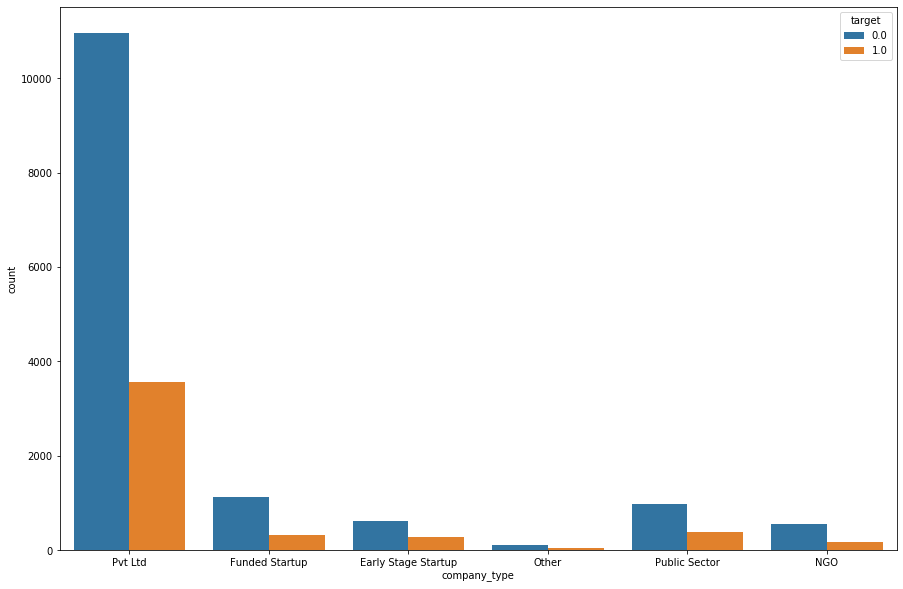

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(data.company_type,hue=data.target)

In [47]:
data.company_type=pd.Categorical(data.company_type,categories=['Other','NGO','Early Stage Startup','Public Sector','Funded Startup','Pvt Ltd'],ordered=True).codes

## Last New Job

In [48]:
data.last_new_job.isnull().sum()

423

In [49]:
data.last_new_job.value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [50]:
data.last_new_job.fillna(method='bfill',inplace=True)

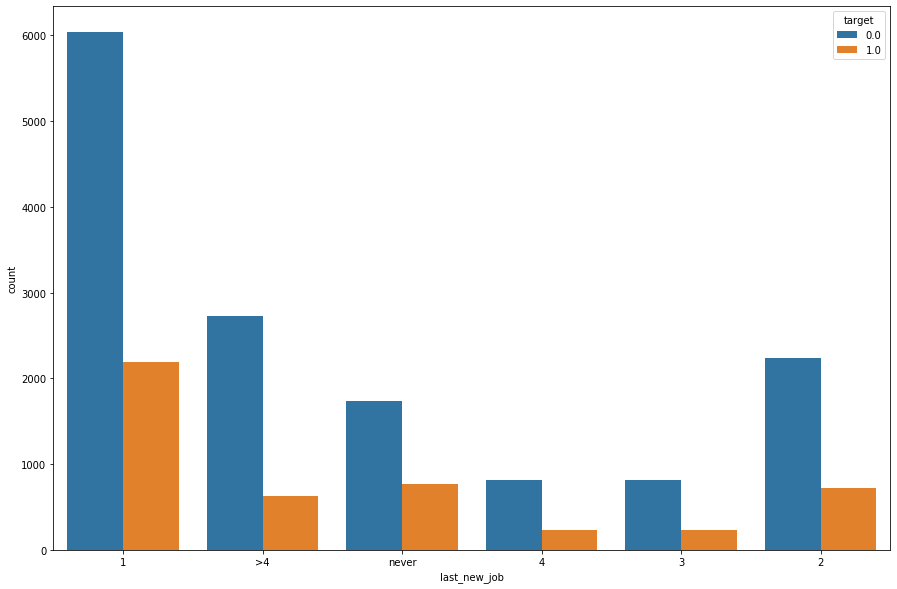

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(data.last_new_job,hue=data.target)

In [52]:
data.last_new_job=pd.Categorical(data.last_new_job,categories=['never','1','2','3','4','>4'],ordered=True).codes

## Correlations Between Each features

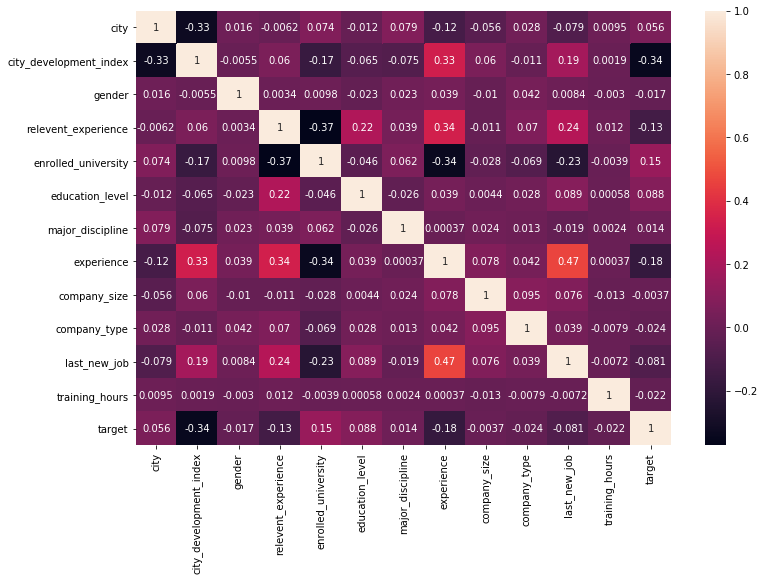

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

## Dataset Spliting 

In [54]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label=train_test_split(data.iloc[:,:12],data.iloc[:,12],test_size=.25,random_state=42)

## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
model1=LogisticRegression(tol=0.001,max_iter=1000)
model1.fit(train_data,train_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

In [56]:
train_pred=model1.predict(train_data)
test_pred=model1.predict(test_data)
print('Classification Report of train_data \n',classification_report(train_label,train_pred))
print('Classification Report of test_data \n',classification_report(test_label,test_pred))

Classification Report of train_data 
               precision    recall  f1-score   support

         0.0       0.79      0.94      0.86     10797
         1.0       0.58      0.24      0.34      3571

    accuracy                           0.77     14368
   macro avg       0.68      0.59      0.60     14368
weighted avg       0.74      0.77      0.73     14368

Classification Report of test_data 
               precision    recall  f1-score   support

         0.0       0.78      0.94      0.85      3584
         1.0       0.55      0.23      0.32      1206

    accuracy                           0.76      4790
   macro avg       0.66      0.58      0.59      4790
weighted avg       0.72      0.76      0.72      4790



## DecisionTreeClassifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(max_depth=10)
model2.fit(train_data,train_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
train_pred2=model2.predict(train_data)
test_pred2=model2.predict(test_data)
print('Classification Report of train_data \n',classification_report(train_label,train_pred2))
print('Classification Report of test_data \n',classification_report(test_label,test_pred2))

Classification Report of train_data 
               precision    recall  f1-score   support

         0.0       0.85      0.92      0.88     10797
         1.0       0.68      0.50      0.57      3571

    accuracy                           0.82     14368
   macro avg       0.76      0.71      0.73     14368
weighted avg       0.81      0.82      0.81     14368

Classification Report of test_data 
               precision    recall  f1-score   support

         0.0       0.81      0.88      0.84      3584
         1.0       0.50      0.37      0.43      1206

    accuracy                           0.75      4790
   macro avg       0.65      0.62      0.63      4790
weighted avg       0.73      0.75      0.74      4790



## RandomForestClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(max_depth=10)
model3.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
train_pred3=model3.predict(train_data)
test_pred3=model3.predict(test_data)
print('Classification Report of train_data \n',classification_report(train_label,train_pred3))
print('Classification Report of test_data \n',classification_report(test_label,test_pred3))

Classification Report of train_data 
               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     10797
         1.0       0.71      0.46      0.56      3571

    accuracy                           0.82     14368
   macro avg       0.78      0.70      0.72     14368
weighted avg       0.81      0.82      0.80     14368

Classification Report of test_data 
               precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      3584
         1.0       0.56      0.38      0.46      1206

    accuracy                           0.77      4790
   macro avg       0.69      0.64      0.66      4790
weighted avg       0.75      0.77      0.75      4790



### Conclusion:- It is quite clear that  Logistic Regression and RandomForest Classifier have similar test accuracy for target=0 (i.e, Not looking for job) but RandomForest have better accuracy for taget =1 (i.e Looking for job) .Thus choosing RandomForest Classifier would be good idea with overall efficiency (77% on test dataset). The reason of low accuracy of target=0 is lack of data.